# non-parametric correlation test
# Spearman's Rank Correlation
## Example:
## comparing snowheights and/or temperature of different locations
---

# The Problem

In this example you'll see how the Spearmann's Rank Correlation Test can be applied on climate relevant data. 

This example is about comparing the monthly average snowheights of two different location.
The two locations differ in height and in the prevailing temperature. Thus the question is, if the location (regional scale) has a significant impact on the snowcover.
The hypothesis you are testing within this example is:

* $H_0$ : Location **does not** influence snow heights $\rightarrow \rho = 0 \rightarrow$ there is **no linear dependence** between the two data sets
* $H_A$ : Location **does** influence snow heights $\rightarrow  "\rho \neq 0" \rightarrow$ there is **linear dependence** between the two data sets

You can choose between 3 locations with either snowheight (SH) or temperature (T) data: 
* Bodental(995m asl) - filename: *''SHBodental.csv''* or *''TBodental.csv''*
* Bärental(987m asl) - filename: *''SHBärental.csv''* or *''TBärental.csv''*
* Zell-Pfarre(900m asl) - filename: *''SHZell.csv''* or *''TZell.csv''*

The files can be found in xxxxxxx, to choose one file you'll have to adapt he the filepath in the filename variable.

Variables that can be adapted:
* Month you want to investigate
* length of the periods
---

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import calendar

from scipy import stats

from scipy.stats import norm
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import kendalltau

## set the filename in the next step:

In [11]:
# at first, choose your file
filename1 = '/home/martin/uni/10_Semester/analys_methods_in_climate_science/project/non_parametric_statistics/InitialData/SHBärental.csv'
filename2 = '/home/martin/uni/10_Semester/analys_methods_in_climate_science/project/non_parametric_statistics/InitialData/TBärental.csv'

In [12]:
# set overall lenght, please leave it like this as not all datasets start at this date.
start_date = '1975-01-01'
end_date = '2015-01-01'

# read csv and store it in pandas dataframe
df_1 = pd.read_csv(filename1, sep='\s+', header=1, names = ('Date','Time', 'delim', 'Height'), encoding = "ISO-8859-1")
df_2 = pd.read_csv(filename2, sep='\s+', header=1, names = ('Date','Time', 'delim', 'Height'), encoding = "ISO-8859-1")

# make sure that numbers are float not object type
df_1 = df_1.rename(columns={'Height': 'data_1'})
df_1['data_1'] = pd.to_numeric(df_1['data_1'].str.replace(',', '.'))

# rename columns
df_2 = df_2.rename(columns={'Height': 'data_2'})
df_2['data_2'] = pd.to_numeric(df_2['data_2'].str.replace(',', '.'))

# merge both df in one frame and set date as index
df_merged = pd.merge(df_1, df_2, on=['Date'])

df_merged = df_merged[["Date", "data_1", "data_2"]]

df_merged['Date'] = pd.to_datetime(df_merged['Date'], format='%d.%m.%Y')
df_merged.set_index('Date', inplace=True)

# filter after predefined period
df_filtered = df_merged[start_date : end_date]

# resample to monthly frequency
df_monthly = df_filtered.resample('M').mean()

df_monthly

data_1     data_2
Date                            
1975-01-31   5.064516  -0.506452
1975-02-28   7.142857  -2.900000
1975-03-31  27.838710  -0.080645
1975-04-30  28.866667   4.720000
1975-05-31   0.000000   9.832258
...               ...        ...
2014-09-30   0.000000  12.196667
2014-10-31   0.161290   9.803226
2014-11-30   0.033333   6.070000
2014-12-31   4.225806   0.212903
2015-01-31  31.000000  -3.100000

[481 rows x 2 columns]

## Set the month you want to investigate
* 1 = January ... 12 = December
* consider that there is no snow in some months! 
* you'll have to change only the variable "monthofinterest"

In [13]:
#select month you want to investigate

monthofinterest = 12

month_name = calendar.month_name[monthofinterest]

df_month_mean = df_monthly.loc[df_monthly.index.month == monthofinterest] # 1 = January... 12 = December
# calculate the monthly mean
df_month_mean = df_month_mean.groupby(df_month_mean.index.year).mean()

df = df_month_mean

# Remove rows with NaN values in 'data_1' and 'data_2' columns
df = df.dropna(subset=['data_1', 'data_2'])

print(df)

         data_1    data_2
Date                     
1975  16.064516 -4.112903
1976  27.548387 -5.648387
1977  33.741935 -4.187097
1978  51.709677 -4.677419
1979  54.483871 -0.922581
1980  91.580645 -4.141935
1981  33.774194 -4.716129
1982  21.032258 -1.161290
1983   9.258065 -3.270968
1984   9.000000 -3.577419
1985  56.032258  0.745161
1986  36.483871 -4.670968
1987  34.870968 -2.029032
1988   1.419355 -1.432258
1989   0.000000 -2.654839
1990  47.483871 -5.100000
1991  43.290323 -4.877419
1992  32.741935 -4.145161
1993  34.161290 -1.696774
1994  21.193548 -1.506452
1995  27.419355 -2.854839
1996  18.548387 -4.861290
1997  43.967742 -1.870968
1998  30.806452 -4.674194
1999  41.483871 -3.522581
2000   9.225806 -1.458065
2001  23.677419 -5.432258
2002   7.129032 -1.238710
2003   5.935484 -2.338710
2004  11.129032 -2.670968
2005  83.354839 -5.206452
2006   7.258065 -1.106452
2007  11.838710 -2.716129
2008  66.193548 -2.535484
2009  10.290323 -2.687097
2010  44.129032 -3.770968
2011   6.064

In [14]:
# create a new DataFrame with the ranks of the Precip and Nino columns
df_rank = df.rank(method='average')

# Remove rows with NaN values in 'data_1' and 'data_2' columns
df_rank = df_rank.dropna(subset=['data_1', 'data_2'])

print(df_rank)

      data_1  data_2
Date                
1975    14.0    14.0
1976    22.0     1.0
1977    25.0    11.0
1978    35.0     8.0
1979    36.0    36.0
1980    40.0    13.0
1981    26.0     7.0
1982    18.0    34.0
1983    10.0    18.0
1984     8.0    16.0
1985    37.0    40.0
1986    29.0    10.0
1987    28.0    27.0
1988     2.0    32.0
1989     1.0    24.0
1990    34.0     4.0
1991    31.0     5.0
1992    24.0    12.0
1993    27.0    29.0
1994    19.0    30.0
1995    21.0    20.0
1996    16.0     6.0
1997    32.0    28.0
1998    23.0     9.0
1999    30.0    17.0
2000     9.0    31.0
2001    20.0     2.0
2002     6.0    33.0
2003     4.0    26.0
2004    12.0    23.0
2005    39.0     3.0
2006     7.0    35.0
2007    13.0    21.0
2008    38.0    25.0
2009    11.0    22.0
2010    33.0    15.0
2011     5.0    38.0
2012    15.0    19.0
2013    17.0    37.0
2014     3.0    39.0


## Have a look on the data & check for ties!

Slope: -0.025
Intercept: -2.211


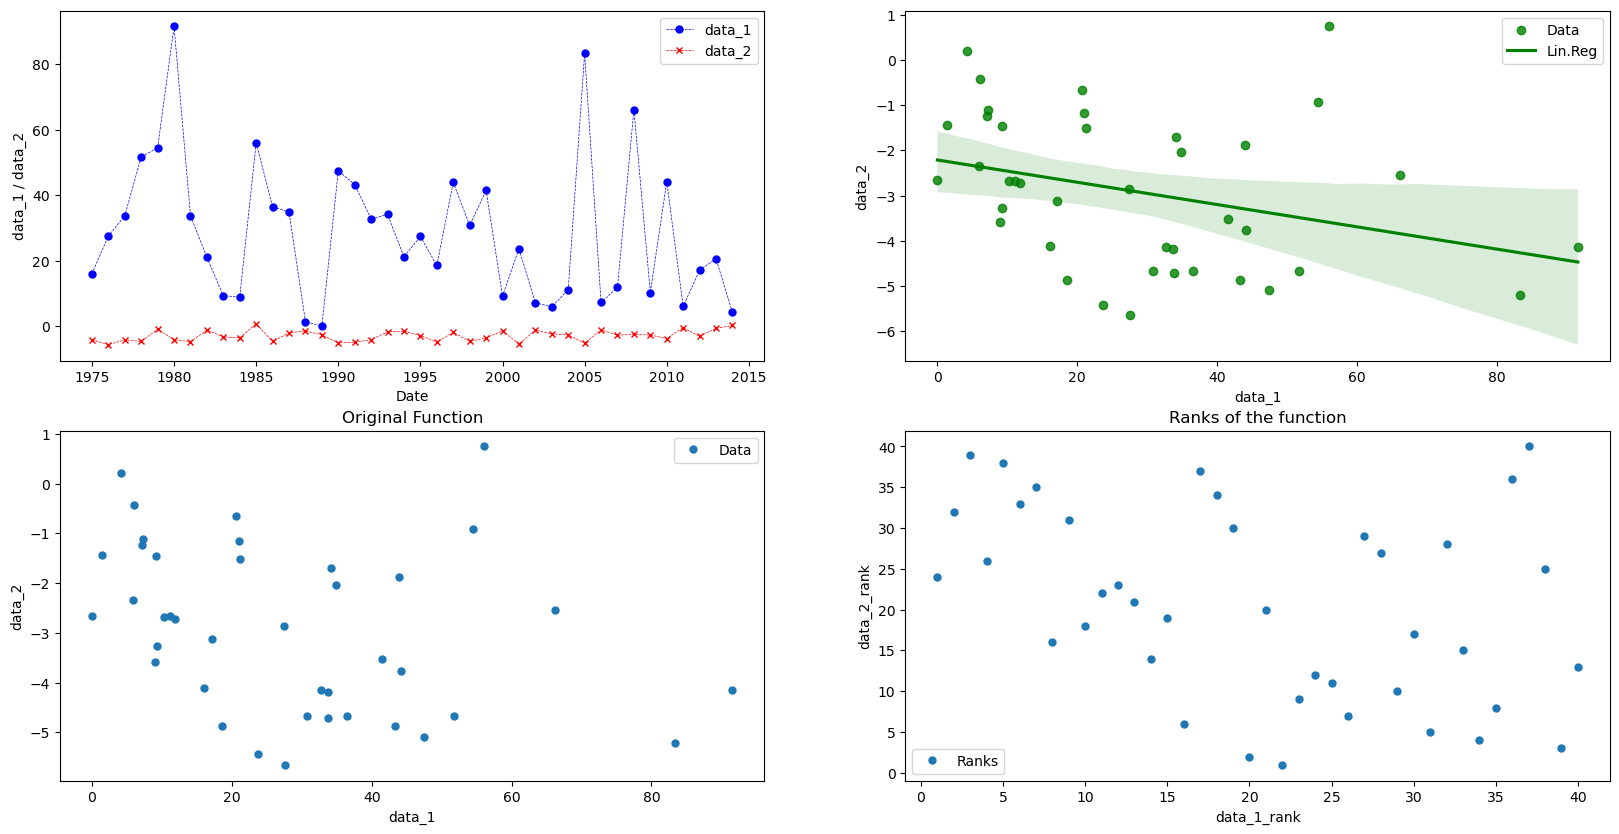

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
df.plot(kind='line', y='data_1', ax=ax[0,0], marker='o', linestyle='--', linewidth = 0.5, color='blue', markersize=5)
df.plot(kind='line', y='data_2', ax=ax[0,0], marker='x', linestyle='--', linewidth = 0.5, color='red', markersize=5)
ax[0,0].set_ylabel('data_1 / data_2')
ax[0,0].legend(['data_1', 'data_2'])

sns.regplot(x='data_1', y='data_2', data=df, ax=ax[0,1], color='green')
ax[0,1].set_xlabel('data_1')
ax[0,1].set_ylabel('data_2')
ax[0,1].legend(['Data', 'Lin.Reg'])

# Plot the original dataframe
ax[1,0].plot(df['data_1'], df['data_2'], label=f'Data',marker='o', markersize=5, linestyle='', linewidth = 0.5)
ax[1,0].set_title('Original Function')
ax[1,0].set_xlabel('data_1')
ax[1,0].set_ylabel('data_2')
ax[1,0].legend()

# Plot the dataframe with the corresponding ranks
ax[1,1].plot(df_rank['data_1'], df_rank['data_2'], label='Ranks',marker='o', markersize=5, linestyle='', linewidth = 0.5)
ax[1,1].set_title('Ranks of the function')
ax[1,1].set_xlabel('data_1_rank')
ax[1,1].set_ylabel('data_2_rank')
ax[1,1].legend()


# Get the fitting parameters of the linear regression
x = df['data_1']
y = df['data_2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Slope:', slope.round(3))
print('Intercept:', intercept.round(3))

# Show the plot
plt.show()

In [16]:
ties_amount = np.isnan(df_rank[df_rank.mod(1) == 0]).sum().sum()

if ties_amount==0:
    ties = False
    print('There are no ties!\nYou can use the Spearmann`s Rank Correlation Test')
else:
    ties = True
    print('There are', ties_amount ,'ties!\nYou should use the Kendall`s Tau Correlation Test')

There are no ties!
You can use the Spearmann`s Rank Correlation Test


## Do we have ties?

In [17]:
# calculate the Spearman rank correlation coefficient and p-value
corr_sp, pval_sp = spearmanr(df['data_1'], df['data_2'])

print("Spearman rank correlation coefficient: ", corr_sp.round(3))
print("p-value: ", pval_sp.round(4))

# Calculate Kendall's Tau correlation coefficient and p-value
corr_ke, pval_ke = kendalltau(df['data_1'], df['data_2'])

# Print the correlation coefficient and p-value
print("Kendall's Tau correlation coefficient:", corr_ke.round(3))
print("P-value:", pval_ke.round(4))


if ties_amount == 0:
    corr = corr_sp
    pval = pval_sp
else:
    corr = corr_ke
    pval = pval_ke

# calculate the standardized statistic
z = corr * np.sqrt(len(df) - 1)
print('\nThe standardized statistic variable is: z = ',z.round(2))


# Get 5% critical value for a standard normal distribution - since twotaild use 2.5%
z_alpha = norm.ppf(0.975)

print('The 5% critical value for a normal distribution is: z_alpha/2 = ', z_alpha.round(2))


if abs(z) < z_alpha:
    print('\nSince, abs(z) < z_alpha/2, the independence hypothesis cannot be rejected!')
    z_line_color = 'green'
else:
    print('\nSince, abs(z) > z_alpha/2, the independence hypothesis has to be rejected!')   
    print('\nThus, one can claim that the monthly mean temperatures influences the monthly mean snowheight in observed region at the 5% significance level.')
    z_line_color = 'red'

Spearman rank correlation coefficient:  -0.376
p-value:  0.0168
Kendall's Tau correlation coefficient: -0.285
P-value: 0.0097

The standardized statistic variable is: z =  -2.35
The 5% critical value for a normal distribution is: z_alpha/2 =  1.96

Since, abs(z) > z_alpha/2, the independence hypothesis has to be rejected!

Thus, one can claim that the monthly mean temperatures influences the monthly mean snowheight in observed region at the 5% significance level.


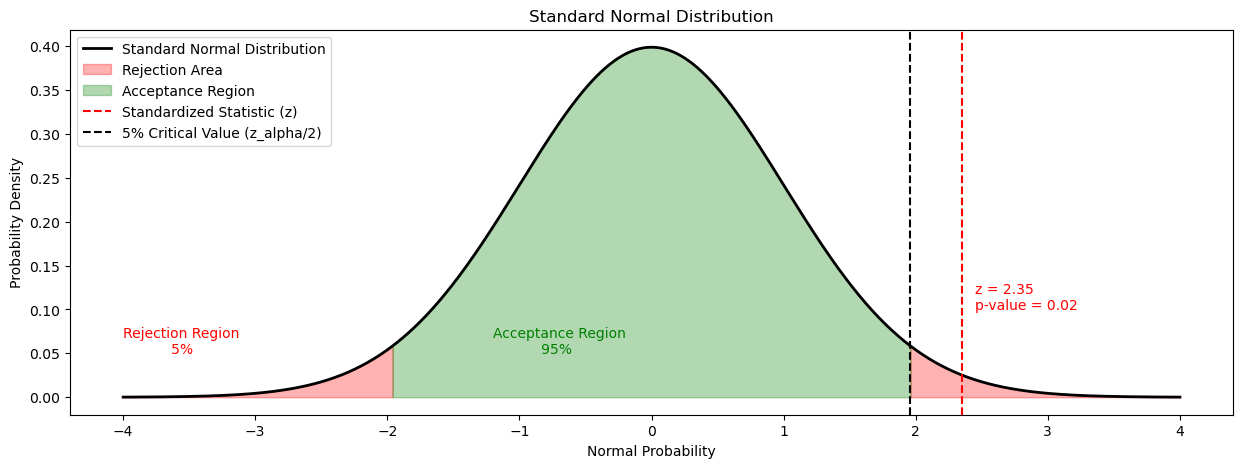

In [18]:
# Generate x values for the normal distribution plot
x = np.linspace(-4, 4, 1000)

# Calculate the y values for the normal distribution plot
y = norm.pdf(x, 0, 1)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the normal distribution curve
ax.plot(x, y, 'k-', linewidth=2, label='Standard Normal Distribution')

# Shade the area corresponding to the right rejection region
x_fill_r = np.linspace(z_alpha, 4, 100)
y_fill_r = norm.pdf(x_fill_r, 0, 1)
ax.fill_between(x_fill_r, y_fill_r, color='red', alpha=0.3, label='Rejection Area')

# Shade the area corresponding to the left rejection region
x_fill_l = np.linspace(-4,-z_alpha, 100)
y_fill_l = norm.pdf(x_fill_l, 0, 1)
ax.fill_between(x_fill_l, y_fill_l, color='red', alpha=0.3)

# Shade the area corresponding to the acceptance region
x_fill_critical = np.linspace(-z_alpha, z_alpha, 100)
y_fill_critical = norm.pdf(x_fill_critical, 0, 1)
ax.fill_between(x_fill_critical, y_fill_critical, color='green', alpha=0.3, label='Acceptance Region')

# Plot the vertical lines for the standardized statistic and critical value
ax.axvline(x=abs(z), color=z_line_color, linestyle='--', label='Standardized Statistic (z)')
ax.axvline(x=z_alpha, color='k', linestyle='--', label='5% Critical Value (z_alpha/2)')

# Set labels and title
ax.set_xlabel('Normal Probability')
ax.set_ylabel('Probability Density')
ax.set_title('Standard Normal Distribution')

# Add legends
ax.legend(loc = 2)

# Add annotations for p-value and critical region
ax.annotate(f'z = {abs(z.round(2))}\np-value = {pval_sp.round(2)}', xy=(abs(z) + 0.1, 0.1), color='red')
ax.annotate(f'Acceptance Region\n           95%', xy=(-1.2, 0.05), color='green')
ax.annotate(f'Rejection Region\n           5%', xy=(-4, 0.05), color='red')

# Show the plot
plt.show()